In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
# read the data
data_path= 'https://raw.githubusercontent.com/MLWave/Black-Boxxy/master/credit-card-default.csv'
ccdefaults = pd.read_csv(data_path)

In [3]:
ccdefaults.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# printing the column names
ccdefaults.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [5]:
# printing the length and breath of dataset like size of a dataset
ccdefaults.shape

(30000, 24)

In [6]:
# Converting the column names into lower order
ccdefaults.rename(columns=lambda x: x.lower(), inplace=True)
ccdefaults.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default payment next month'],
      dtype='object')

In [7]:
#Changing the names of columns
ccdefaults.rename(columns={'pay_0':'pay_1','default payment next month':'default'}, inplace=True)
ccdefaults.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default'],
      dtype='object')

In [16]:
# Cheaking for the null values in the dataset
ccdefaults.isnull()

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
# checking the total number of missing values in the entire dataset i.e., columns and rows
ccdefaults.isnull().sum().sum()

0

In [18]:
# Checking the correlation between the variables
ccdefaults.corr()

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
limit_bal,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
sex,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
education,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
marriage,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
age,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
pay_1,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
pay_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
pay_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
pay_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
pay_5,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,...,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149


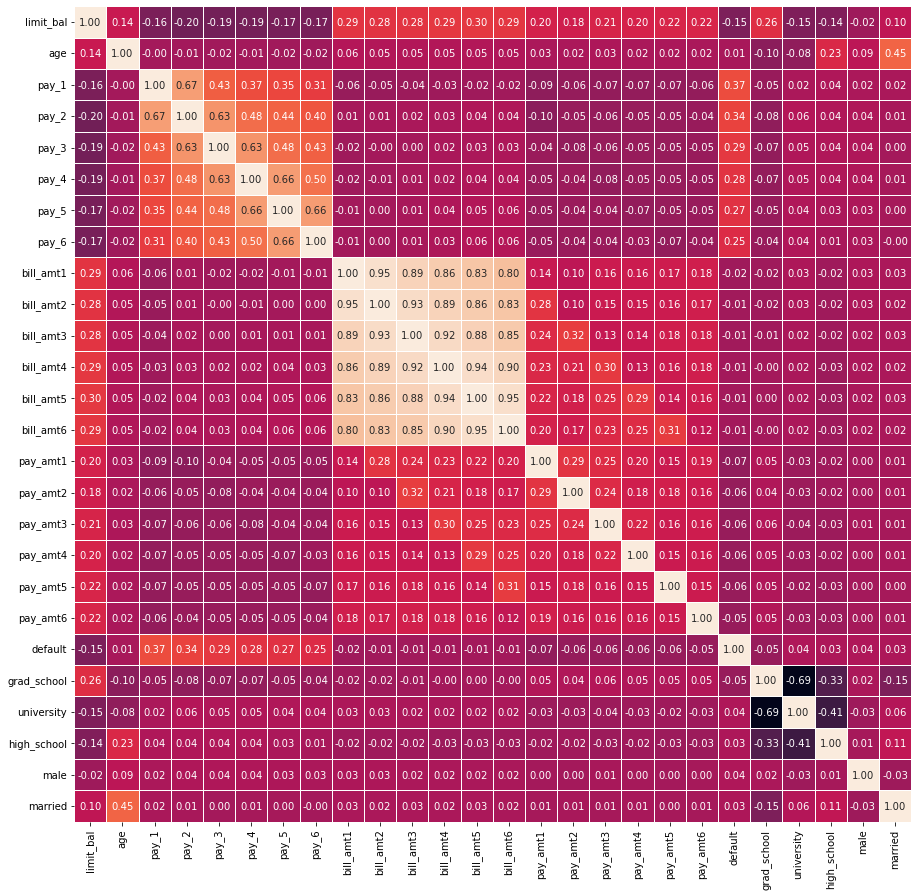

In [66]:
# Plotting the heat map of correlations of a data set
plt.figure(figsize=(15,15))
sns.heatmap(ccdefaults.corr(),annot=True,fmt=".2f",linewidth=0.5,cbar=False)
plt.show()

In [20]:
# Checking the unique values in columns of EDUCATION and MARRIAGE
print("\n", "ccdefaults['education'].unique()", "\n", ccdefaults['education'].unique())
print("\n", "ccdefaults['marriage'].unique()","\n", ccdefaults['marriage'].unique())


 ccdefaults['education'].unique() 
 [2 1 3 5 4 6 0]

 ccdefaults['marriage'].unique() 
 [1 2 3 0]


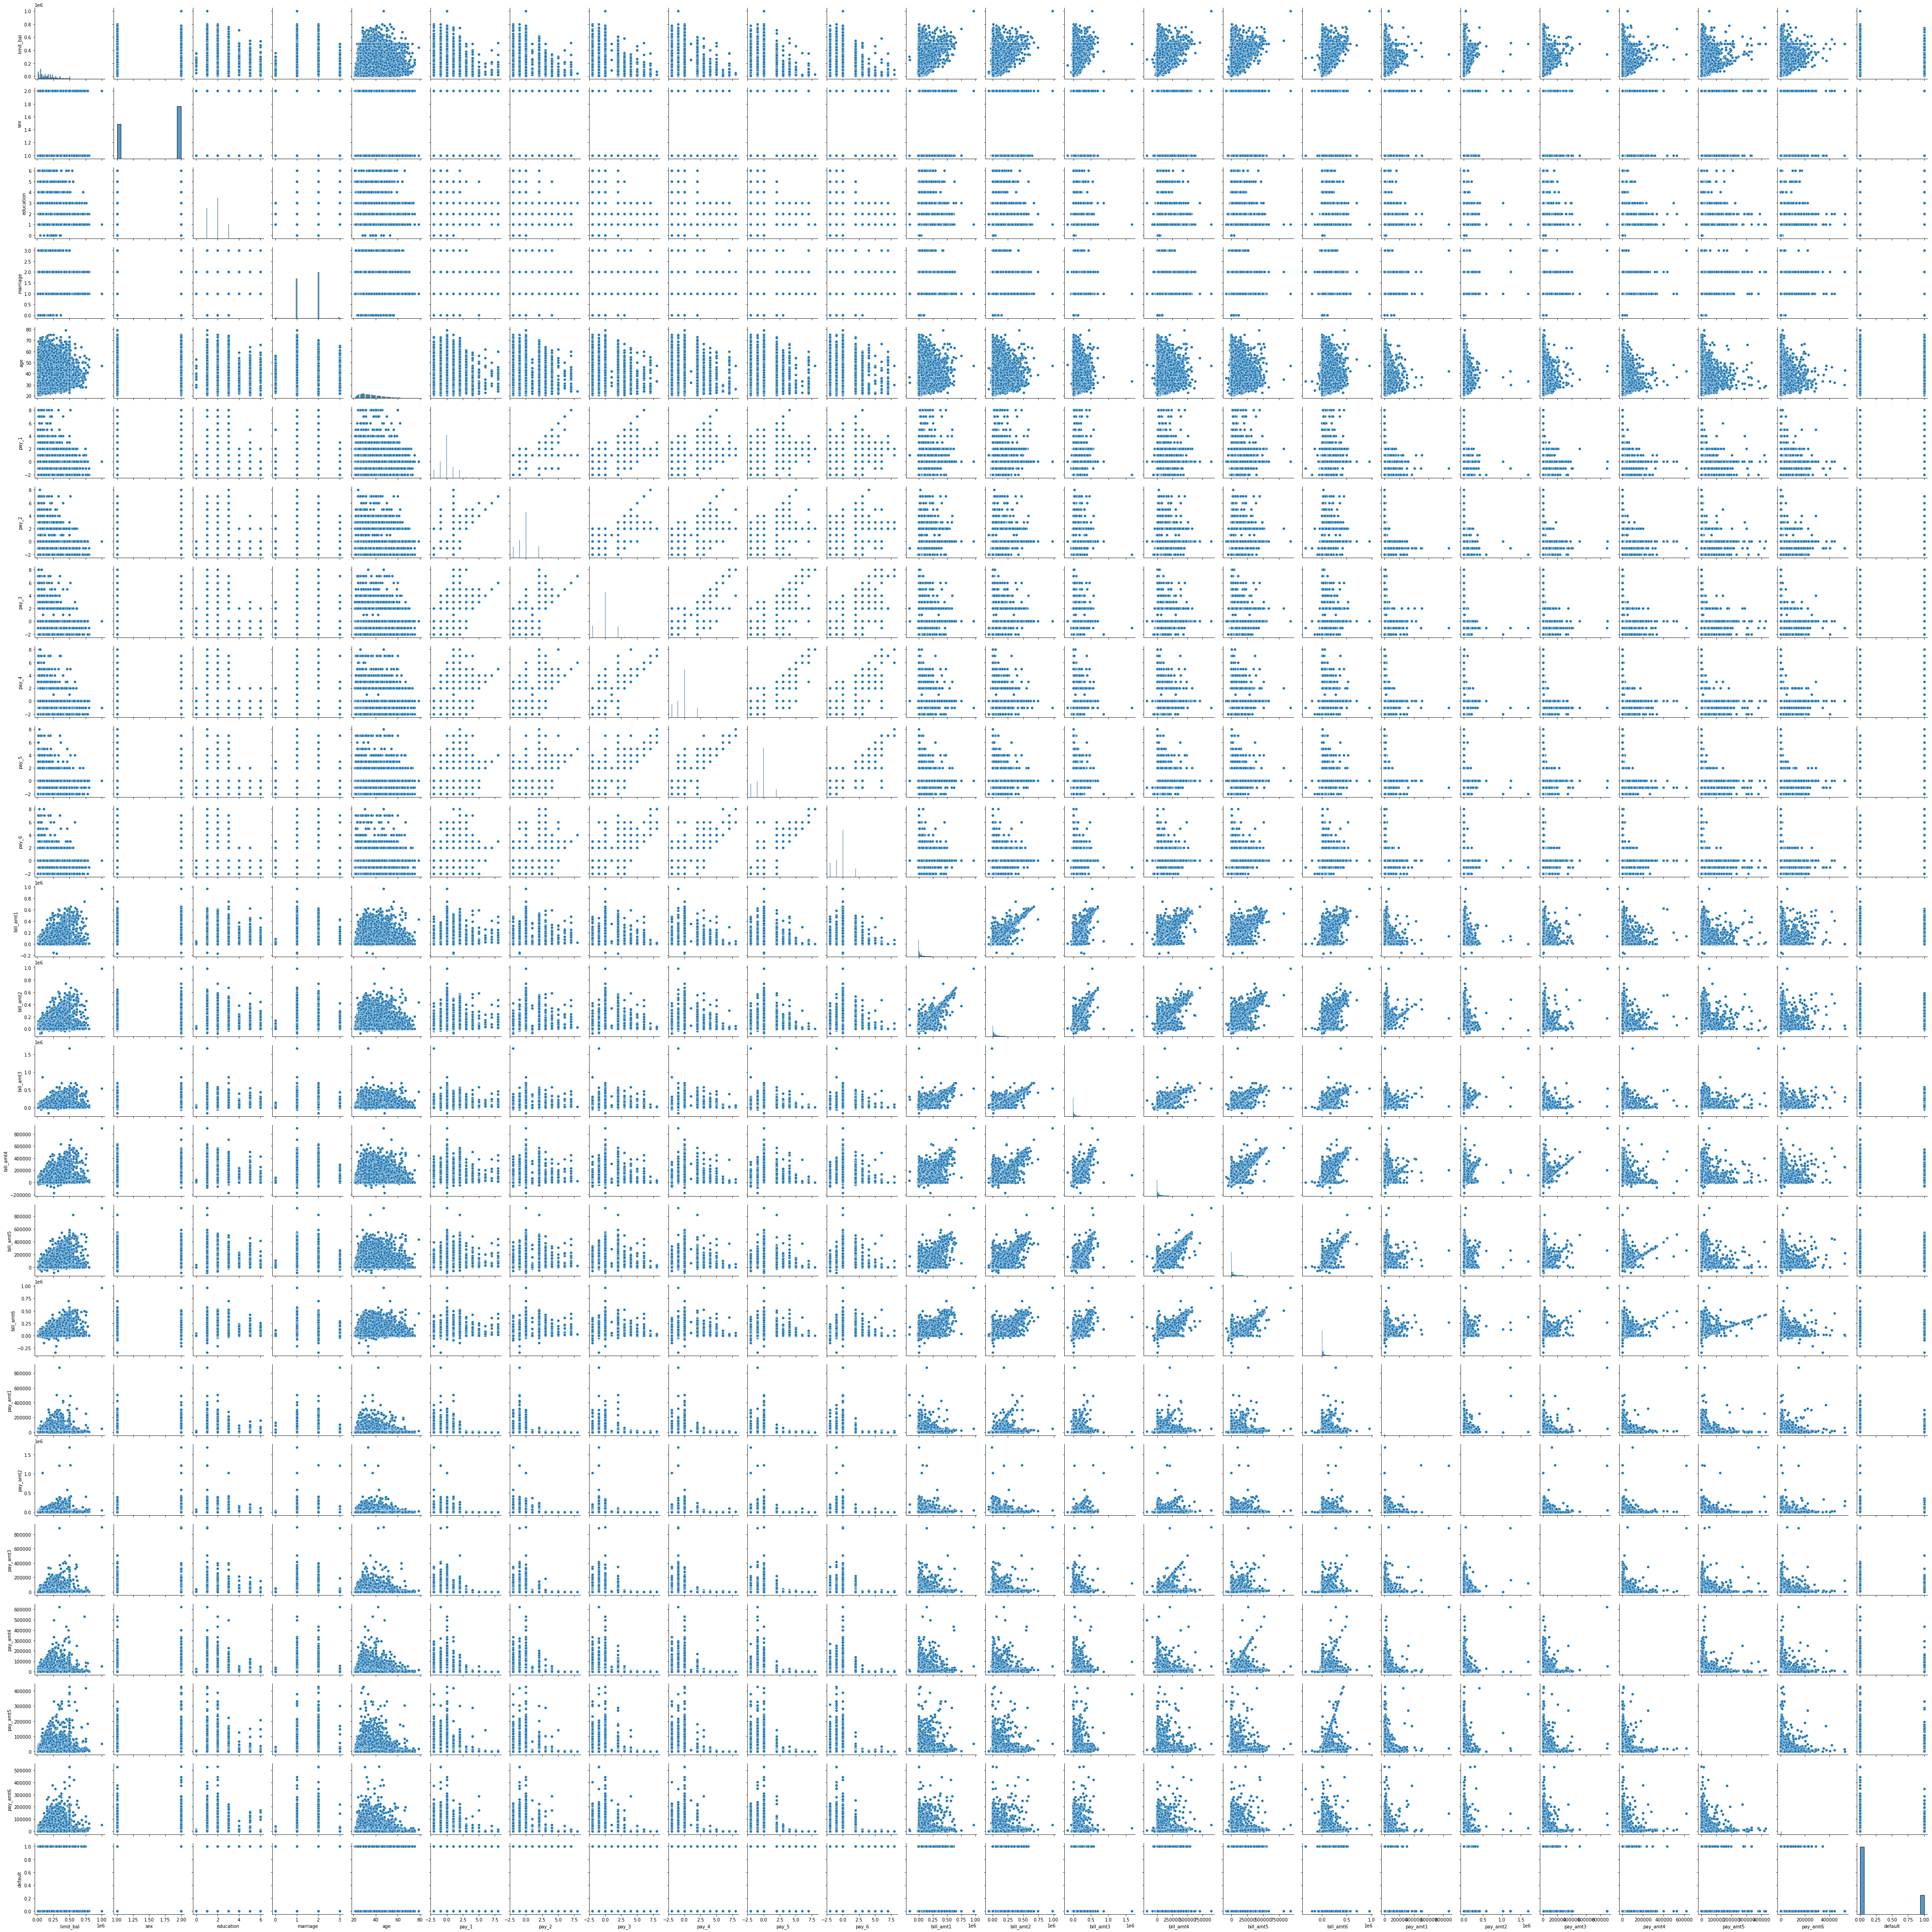

In [21]:
sns.pairplot(ccdefaults)

In [22]:
# Transforming values for education
ccdefaults['grad_school'] = (ccdefaults['education'] == 1).astype('int')
ccdefaults['university'] = (ccdefaults['education'] == 2).astype('int')
ccdefaults['high_school'] = (ccdefaults['education'] == 3).astype('int')

In [23]:
# Transforming values for Sex and marriage
ccdefaults['male'] = (ccdefaults['sex']==1).astype('int')
ccdefaults['married'] = (ccdefaults['marriage'] == 1).astype('int')

In [24]:
# Dropping the columns of Education, Marriage and Sex
ccdefaults.drop(['sex','marriage', 'education'], axis=1, inplace=True)
print("\n", 50 * "-", "\n", "ccdefaults.head(10)", "\n", ccdefaults.head(10))
print("\n", 50 * "-", "\n", "ccdefaults.columns", "\n", ccdefaults.columns)


 -------------------------------------------------- 
 ccdefaults.head(10) 
    limit_bal  age  pay_1  pay_2  pay_3  pay_4  pay_5  pay_6  bill_amt1  \
0      20000   24      2      2     -1     -1     -2     -2       3913   
1     120000   26     -1      2      0      0      0      2       2682   
2      90000   34      0      0      0      0      0      0      29239   
3      50000   37      0      0      0      0      0      0      46990   
4      50000   57     -1      0     -1      0      0      0       8617   
5      50000   37      0      0      0      0      0      0      64400   
6     500000   29      0      0      0      0      0      0     367965   
7     100000   23      0     -1     -1      0      0     -1      11876   
8     140000   28      0      0      2      0      0      0      11285   
9      20000   35     -2     -2     -2     -2     -1     -1          0   

   bill_amt2  ...  pay_amt3  pay_amt4  pay_amt5  pay_amt6  default  \
0       3102  ...         0         0 

In [25]:
print("\n", 50 * "-", "\n", "\nLower the column names for pay delay") 
# For pay_i features: if >0 then it means the customer was delayed i months ago
pay_features = ['pay_' + str(i) for i in range(1,7)]
for p in pay_features:
    ccdefaults[p] = (ccdefaults[p] > 0).astype(int)
print("\n", 50 * "-", "\n", "pay_features", "\n", pay_features)
print("\n", 50 * "-", "\n", "ccdefaults.head(10)", "\n", ccdefaults.head(10))
print("\n", 50 * "-", "\n", "ccdefaults.columns", "\n", ccdefaults.columns)


 -------------------------------------------------- 
 
Lower the column names for pay delay

 -------------------------------------------------- 
 pay_features 
 ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

 -------------------------------------------------- 
 ccdefaults.head(10) 
    limit_bal  age  pay_1  pay_2  pay_3  pay_4  pay_5  pay_6  bill_amt1  \
0      20000   24      1      1      0      0      0      0       3913   
1     120000   26      0      1      0      0      0      1       2682   
2      90000   34      0      0      0      0      0      0      29239   
3      50000   37      0      0      0      0      0      0      46990   
4      50000   57      0      0      0      0      0      0       8617   
5      50000   37      0      0      0      0      0      0      64400   
6     500000   29      0      0      0      0      0      0     367965   
7     100000   23      0      0      0      0      0      0      11876   
8     140000   28      0      0      1 

In [26]:
df_split = ccdefaults.sample(frac=0.3,random_state=200)
new_df = df_split.drop('default', axis=1)
new_df.head()

,limit_bal,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,...,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,grad_school,university,high_school,male,married
17269,130000,34,0,0,0,0,0,0,99891,101032,...,5300,4000,4000,4000,6100,0,1,0,0,1
22363,290000,27,0,0,0,0,0,0,168,569,...,1000,1000,200,265,500,1,0,0,0,0
23879,360000,27,0,0,0,0,0,0,2807,894,...,5970,1396,0,0,0,1,0,0,1,0
9073,110000,35,0,1,0,0,0,0,549,179,...,1166,0,446,1729,0,1,0,0,0,0
25082,260000,48,0,0,0,0,0,0,154927,158848,...,6000,7100,5300,5000,5000,0,0,1,1,1


In [27]:
new_y = df_split['default']
new_y.head()

17269    0
22363    0
23879    0
9073     0
25082    0
Name: default, dtype: int64

In [28]:
target_name = 'default'
X = ccdefaults.drop('default', axis=1)
print("\n", "X.head(10)", "\n", X.head(10))
print("\n", "X.columns", "\n", X.columns)


 X.head(10) 
    limit_bal  age  pay_1  pay_2  pay_3  pay_4  pay_5  pay_6  bill_amt1  \
0      20000   24      1      1      0      0      0      0       3913   
1     120000   26      0      1      0      0      0      1       2682   
2      90000   34      0      0      0      0      0      0      29239   
3      50000   37      0      0      0      0      0      0      46990   
4      50000   57      0      0      0      0      0      0       8617   
5      50000   37      0      0      0      0      0      0      64400   
6     500000   29      0      0      0      0      0      0     367965   
7     100000   23      0      0      0      0      0      0      11876   
8     140000   28      0      0      1      0      0      0      11285   
9      20000   35      0      0      0      0      0      0          0   

   bill_amt2  ...  pay_amt2  pay_amt3  pay_amt4  pay_amt5  pay_amt6  \
0       3102  ...       689         0         0         0         0   
1       1725  ...      1000 

### Using Robost Scaler to transform X

In [29]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
feature_names = X.columns
X = robust_scaler.fit_transform(X)
print("\n", "after robust_scaler.fit_transform(X), X is as follows:", "\n", X)


 after robust_scaler.fit_transform(X), X is as follows: 
 [[-0.63157895 -0.76923077  1.         ...  0.          0.
   1.        ]
 [-0.10526316 -0.61538462  0.         ...  0.          0.
   0.        ]
 [-0.26315789  0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.57894737  0.23076923  1.         ...  0.          1.
   0.        ]
 [-0.31578947  0.53846154  1.         ...  1.          1.
   1.        ]
 [-0.47368421  0.92307692  0.         ...  0.          1.
   1.        ]]


In [30]:
y = ccdefaults[target_name]
print("\n", "y", "\n", y.head(10))


 y 
 0    1
1    1
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: default, dtype: int64


### Creating train and test dataset

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=55, stratify=y)
print("\n", "X_train", "\n", X_train)
print("\n", "X_test", "\n", X_test)
print("\n", "y_train", "\n", y_train.head(10))
print("\n", "y_test", "\n", y_test.head(10))


 X_train 
 [[-0.31578947 -0.69230769  1.         ...  0.          0.
   0.        ]
 [-0.47368421 -0.92307692  0.         ...  0.          1.
   0.        ]
 [ 0.31578947  0.38461538  0.         ...  0.          0.
   1.        ]
 ...
 [-0.47368421 -0.92307692  0.         ...  0.          1.
   0.        ]
 [-0.63157895  0.          0.         ...  0.          1.
   0.        ]
 [ 1.89473684  1.15384615  0.         ...  0.          1.
   1.        ]]

 X_test 
 [[ 0.36842105 -0.53846154  0.         ...  0.          0.
   0.        ]
 [-0.47368421 -0.84615385  0.         ...  0.          0.
   0.        ]
 [ 0.42105263 -0.61538462  0.         ...  0.          0.
   0.        ]
 ...
 [ 0.         -0.46153846  0.         ...  0.          1.
   0.        ]
 [-0.63157895 -0.69230769  0.         ...  0.          1.
   0.        ]
 [ 0.63157895  1.53846154  0.         ...  1.          0.
   1.        ]]

 y_train 
 18736    1
23948    0
12306    0
4022     0
27773    1
14157    0
3246     0


### Creating the dataframe to restore to values of different models

In [45]:
print("\n", 50 * "-", "\nCreating Data Frame Evaluation Matrix")
# Data frame for evaluation metrics
metrics = pd.DataFrame(index=['Decision Tree' ,'SVM', 'k-nn'],columns=['Accuracy', 'F-1 Score', 'Precision', 'Sensitivity', 'Specificity'])
metrics


 -------------------------------------------------- 
Creating Data Frame Evaluation Matrix


,Accuracy,F-1 Score,Precision,Sensitivity,Specificity
Decision Tree,NaN,NaN,NaN,NaN,NaN
SVM,NaN,NaN,NaN,NaN,NaN
k-nn,NaN,NaN,NaN,NaN,NaN


### Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
Decision_Tree = DecisionTreeClassifier(random_state=0)
fit = Decision_Tree.fit(X_train, y_train)

In [47]:
y_predict1 = fit.predict(X_test)
y_predict1

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [48]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score

In [49]:
conf_matrix1 = confusion_matrix(y_true=y_test, y_pred=y_predict1)
conf_matrix1

array([[2844,  661],
       [ 587,  408]], dtype=int64)

In [50]:
acc_score1 = accuracy_score(y_test, y_predict1)
print('Accuracy :', acc_score1)

F1_score1 = f1_score(y_test, y_predict1)
print('F1_Score :', F1_score1)

Precission1 = precision_score(y_test, y_predict1)
print('Precission :', Precission1)

sensitivity1 = conf_matrix1[0,0]/(conf_matrix1[0,0]+conf_matrix1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = conf_matrix1[1,1]/(conf_matrix1[1,0]+conf_matrix1[1,1])
print('Specificity : ', specificity1)

Accuracy : 0.7226666666666667
F1_Score : 0.39534883720930236
Precission : 0.3816651075771749
Sensitivity :  0.8114122681883025
Specificity :  0.4100502512562814


In [51]:
metrics.loc['Decision Tree','Accuracy'] = acc_score1
metrics.loc['Decision Tree','F-1 Score'] = F1_score1
metrics.loc['Decision Tree','Precision'] = Precission1
metrics.loc['Decision Tree','Sensitivity'] = sensitivity1
metrics.loc['Decision Tree','Specificity'] = specificity1

metrics

,Accuracy,F-1 Score,Precision,Sensitivity,Specificity
Decision Tree,0.722667,0.395349,0.381665,0.811412,0.41005
SVM,NaN,NaN,NaN,NaN,NaN
k-nn,NaN,NaN,NaN,NaN,NaN


### SVM

In [52]:
from sklearnex import patch_sklearn 
patch_sklearn()

from sklearn.svm import SVC


clf = SVC(kernel='linear') # Linear Kernel
fit1 = clf.fit(X_train, y_train)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [53]:
y_predict2 = fit1.predict(X_test)
y_predict2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [54]:
conf_matrix2 = confusion_matrix(y_true=y_test, y_pred=y_predict2)
conf_matrix2

array([[3189,  316],
       [ 606,  389]], dtype=int64)

In [56]:
acc_score2 = accuracy_score(y_test, y_predict2)
print('Accuracy :', acc_score2)

F1_score2 = f1_score(y_test, y_predict1)
print('F1_Score :', F1_score2)

Precission2 = precision_score(y_test, y_predict2)
print('Precission :', Precission2)

sensitivity2 = conf_matrix2[0,0]/(conf_matrix2[0,0]+conf_matrix2[0,1])
print('Sensitivity : ', sensitivity2 )

specificity2 = conf_matrix2[1,1]/(conf_matrix2[1,0]+conf_matrix2[1,1])
print('Specificity : ', specificity2)

Accuracy : 0.7951111111111111
F1_Score : 0.39534883720930236
Precission : 0.5517730496453901
Sensitivity :  0.9098430813124109
Specificity :  0.39095477386934674


In [57]:
metrics.loc['SVM','Accuracy'] = acc_score2
metrics.loc['SVM','F-1 Score'] = F1_score2
metrics.loc['SVM','Precision'] = Precission2
metrics.loc['SVM','Sensitivity'] = sensitivity2
metrics.loc['SVM','Specificity'] = specificity2

metrics

,Accuracy,F-1 Score,Precision,Sensitivity,Specificity
Decision Tree,0.722667,0.395349,0.381665,0.811412,0.41005
SVM,0.795111,0.395349,0.551773,0.909843,0.390955
k-nn,NaN,NaN,NaN,NaN,NaN


#### KNN

In [58]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier()
fit2 = knn.fit(X_train, y_train)

In [59]:
y_predict3 = fit2.predict(X_test)

y_predict3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
conf_matrix3 = confusion_matrix(y_true=y_test, y_pred=y_predict3)
conf_matrix3

array([[3193,  312],
       [ 673,  322]], dtype=int64)

In [61]:
acc_score3 = accuracy_score(y_test, y_predict3)
print('Accuracy :', acc_score3)

F1_score3 = f1_score(y_test, y_predict3)
print('F1_Score :', F1_score3)

Precission3 = precision_score(y_test, y_predict3)
print('Precission :', Precission3)

sensitivity3 = conf_matrix3[0,0]/(conf_matrix3[0,0]+conf_matrix3[0,1])
print('Sensitivity : ', sensitivity3 )

specificity3 = conf_matrix3[1,1]/(conf_matrix3[1,0]+conf_matrix3[1,1])
print('Specificity : ', specificity3)

Accuracy : 0.7811111111111111
F1_Score : 0.3953345610804174
Precission : 0.5078864353312302
Sensitivity :  0.9109843081312411
Specificity :  0.3236180904522613


In [62]:
metrics.loc['k-nn','Accuracy'] = acc_score3
metrics.loc['k-nn','F-1 Score'] = F1_score3
metrics.loc['k-nn','Precision'] = Precission3
metrics.loc['k-nn','Sensitivity'] = sensitivity3
metrics.loc['k-nn','Specificity'] = specificity3

metrics

,Accuracy,F-1 Score,Precision,Sensitivity,Specificity
Decision Tree,0.722667,0.395349,0.381665,0.811412,0.41005
SVM,0.795111,0.395349,0.551773,0.909843,0.390955
k-nn,0.781111,0.395335,0.507886,0.910984,0.323618


In [6]:
import numpy as np
import gym

In [9]:
env = gym.make("FrozenLake-v1")
n_observations = env.observation_space.n
n_actions = env.action_space.n

In [10]:
Q_table = np.zeros((n_observations,n_actions))
print(Q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [11]:
#number of episode we will run
n_episodes = 10000

#maximum of iteration per episode
max_iter_episode = 100

#initialize the exploration probability to 1
exploration_proba = 1

#exploartion decreasing decay for exponential decreasing
exploration_decreasing_decay = 0.001

# minimum of exploration proba
min_exploration_proba = 0.01

#discounted factor
gamma = 0.99

#learning rate
lr = 0.1

In [14]:
total_rewards_episode = list()
rewards_per_episode=[]

In [15]:
#we iterate over episodes
for e in range(n_episodes):
    #we initialize the first state of the episode
    current_state = env.reset()
    done = False
    
    #sum the rewards that the agent gets from the environment
    total_episode_reward = 0
    
    for i in range(max_iter_episode): 
        # we sample a float from a uniform distribution over 0 and 1
        # if the sampled flaot is less than the exploration proba
        #     the agent selects arandom action
        # else
        #     he exploits his knowledge using the bellman equation 
        
        if np.random.uniform(0,1) < exploration_proba:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q_table[current_state,:])
            # The environment runs the chosen action and returns
        # the next state, a reward and true if the epiosed is ended.
        next_state, reward, done, _ = env.step(action)
        
        # We update our Q-table using the Q-learning iteration
        Q_table[current_state, action] = (1-lr) * Q_table[current_state, action] +lr*(reward + gamma*max(Q_table[next_state,:]))
        total_episode_reward = total_episode_reward + reward
        # If the episode is finished, we leave the for loop
        if done:
            break
        current_state = next_state
    #We update the exploration proba using exponential decay formula 
    exploration_proba = max(min_exploration_proba, np.exp(-exploration_decreasing_decay*e))
    rewards_per_episode.append(total_episode_reward)
            
                        
                                                                        

In [28]:
print("Mean reward per thousand episodes")
for i in range(10):
    print((i+1)*1000,"mean espiode reward:",np.mean(rewards_per_episode[1000*i:1000*(i+1)]))

Mean reward per thousand episodes
1000 mean espiode reward: 0.052
2000 mean espiode reward: 0.218
3000 mean espiode reward: 0.435
4000 mean espiode reward: 0.602
5000 mean espiode reward: 0.665
6000 mean espiode reward: 0.684
7000 mean espiode reward: 0.667
8000 mean espiode reward: 0.677
9000 mean espiode reward: 0.701
10000 mean espiode reward: 0.683
